## Overview

This analysis assumes plants have been cropped and masked/segmented, each into their own image, and all plant images have been processed with `pypl analyze` with the default value of `k = 10`. This produces a data frame with $n <= 9$ rows per plant. Each row $n$ corresponds to the $n$'th most common color cluster, with RGB, HSV, and hexadecimal encodings, along with the number of pixels belonging to that cluster and the proportion of total pixels that number represents.

## Data preparation

### Loading the data

Begin by loading data from CSV.

In [1]:
import pandas as pd

df = pd.read_csv('../data_sarracenia/tabular/masked.colors.csv', index_col=0)
df

,Image,Hex,R,G,B,H,S,V,Freq,Prop
0,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#95962f,0.584314,0.588235,0.184314,0.168285,0.686667,0.588235,253104,0.099263
1,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#a16a3d,0.631373,0.415686,0.239216,0.075000,0.621118,0.631373,331614,0.130053
2,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#883a22,0.533333,0.227451,0.133333,0.039216,0.750000,0.533333,183669,0.072032
3,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#825a2b,0.509804,0.352941,0.168627,0.090038,0.669231,0.509804,339249,0.133047
4,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#c4bb67,0.768627,0.733333,0.403922,0.150538,0.474490,0.768627,236682,0.092822
...,...,...,...,...,...,...,...,...,...,...
8779,data_sarracenia/masked/9_6_18.Maxsea.r010.mask...,#3c2211,0.235294,0.133333,0.066667,0.065891,0.716667,0.235294,225010,0.197028
8780,data_sarracenia/masked/9_6_18.Maxsea.r010.mask...,#b08f80,0.690196,0.560784,0.501961,0.052083,0.272727,0.690196,59631,0.052215
8781,data_sarracenia/masked/9_6_18.Maxsea.r010.mask...,#996864,0.600000,0.407843,0.392157,0.012579,0.346405,0.600000,75363,0.065991
8782,data_sarracenia/masked/9_6_18.Maxsea.r010.mask...,#7c4644,0.486275,0.274510,0.266667,0.005952,0.451613,0.486275,114237,0.100031


#### Cleaning the data

Next we clean up the data and parse filenames for date, treatment, and plant label.

In [10]:
from pytcherplants.utils import *

# extract date, treatment and name from image name
df['Date'] = pd.to_datetime(df.apply(row_date, axis=1).tolist(), format='%m_%d_%y')
df['Treatment'] = df.apply(row_treatment, axis=1)
df['Name'] = df.apply(row_name, axis=1)

# drop rows with unknowns (malformed filename format)
df.dropna(how='any', inplace=True)

df

,Image,Hex,R,G,B,H,S,V,Freq,Prop,Date,Treatment,Name
0,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#95962f,0.584314,0.588235,0.184314,0.168285,0.686667,0.588235,253104,0.099263,2019-10-14,10_30_20,f102-04049
1,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#a16a3d,0.631373,0.415686,0.239216,0.075000,0.621118,0.631373,331614,0.130053,2019-10-14,10_30_20,f102-04049
2,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#883a22,0.533333,0.227451,0.133333,0.039216,0.750000,0.533333,183669,0.072032,2019-10-14,10_30_20,f102-04049
3,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#825a2b,0.509804,0.352941,0.168627,0.090038,0.669231,0.509804,339249,0.133047,2019-10-14,10_30_20,f102-04049
4,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#c4bb67,0.768627,0.733333,0.403922,0.150538,0.474490,0.768627,236682,0.092822,2019-10-14,10_30_20,f102-04049
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,data_sarracenia/masked/9_6_18.Maxsea.r010.mask...,#3c2211,0.235294,0.133333,0.066667,0.065891,0.716667,0.235294,225010,0.197028,2018-09-06,maxsea,r010
8780,data_sarracenia/masked/9_6_18.Maxsea.r010.mask...,#b08f80,0.690196,0.560784,0.501961,0.052083,0.272727,0.690196,59631,0.052215,2018-09-06,maxsea,r010
8781,data_sarracenia/masked/9_6_18.Maxsea.r010.mask...,#996864,0.600000,0.407843,0.392157,0.012579,0.346405,0.600000,75363,0.065991,2018-09-06,maxsea,r010
8782,data_sarracenia/masked/9_6_18.Maxsea.r010.mask...,#7c4644,0.486275,0.274510,0.266667,0.005952,0.451613,0.486275,114237,0.100031,2018-09-06,maxsea,r010


## Scale conversion

Next we can load an image with a ruler for a reference scale, and calculate a conversion factor between pixels and standard/imperial units.

First load the image.

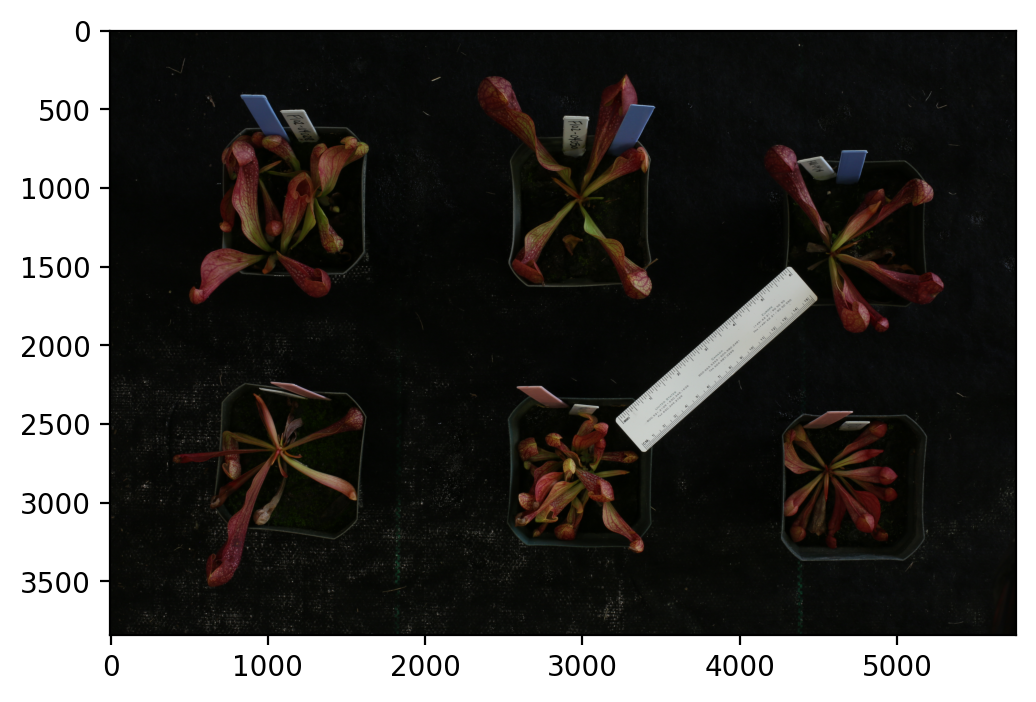

In [25]:
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline
mpl.rcParams['figure.dpi'] = 200

scale = cv2.cvtColor(cv2.imread('../data_sarracenia/scale.jpg'), cv2.COLOR_RGB2BGR)
plt.imshow(scale)

Overlay a rectangle to measure scale.

/Users/wes/dev/pytcherplants/venv/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


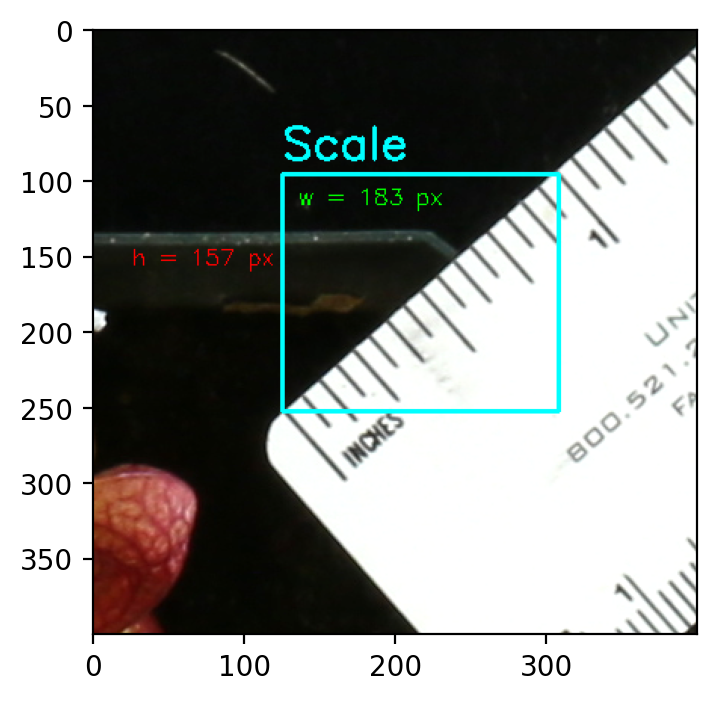

In [86]:
scale_copy = scale.copy()

# reduce image brightness
a = np.ones(scale_copy.shape, dtype=np.float) / 200
scale_copy = scale_copy * a

# define scaling box
x = 3225
y = 2295
w = 183
h = 157
cv2.rectangle(scale_copy, (x, y), (x + w, y + h), (0, 220, 50), 2)
cv2.putText(scale_copy,
            "Scale",
            (x, y - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            1.0,
            (0, 220, 50),
            2)
cv2.putText(scale_copy,
            f"w = {w} px",
            (x + 10, y + 20),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (0, 255, 0),
            1)
cv2.putText(scale_copy,
            f"h = {h} px",
            (x - 100, y + 60),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (255, 0, 0),
            1)

# zoom in
cropped = scale_copy[2200:2600, 3100:3500]
plt.imshow(cropped)

Since $ a^2 + b^2 = c^2 $ we have a length conversion factor $ c =  \sqrt{ 157^2 + 183^2 } \approx 241.118228262 $ pixels per inch. The area conversion is then $ 241.118228262^2 \approx 58138.0000002 $ pixels per square inch.

**Conversion Factors**
- $241.1182 \text{ px} / \text{in}$
- $58138 \text{ px} / \text{in}^2$


Now we can convert pixel counts to approximate area in square inches.

In [88]:
df['SqIn'] = df['Freq'].astype(float) / 58138
df

,Image,Hex,R,G,B,H,S,V,Freq,Prop,Date,Treatment,Name,HH,HueBin,HScaled,HBin,Area,SqIn
0,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#95962f,0.584314,0.588235,0.184314,0.168285,0.686667,0.588235,253104,0.099263,2019-10-14,10_30_20,f102-04049,60,60,60,60,4.353504,4.353504
1,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#a16a3d,0.631373,0.415686,0.239216,0.075000,0.621118,0.631373,331614,0.130053,2019-10-14,10_30_20,f102-04049,27,25,27,25,5.703911,5.703911
2,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#883a22,0.533333,0.227451,0.133333,0.039216,0.750000,0.533333,183669,0.072032,2019-10-14,10_30_20,f102-04049,14,10,14,10,3.159190,3.159190
3,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#825a2b,0.509804,0.352941,0.168627,0.090038,0.669231,0.509804,339249,0.133047,2019-10-14,10_30_20,f102-04049,32,30,32,30,5.835237,5.835237
4,data_sarracenia/masked/10_14_19.10_30_20.f102-...,#c4bb67,0.768627,0.733333,0.403922,0.150538,0.474490,0.768627,236682,0.092822,2019-10-14,10_30_20,f102-04049,54,50,54,50,4.071038,4.071038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,data_sarracenia/masked/9_6_18.Maxsea.r010.mask...,#3c2211,0.235294,0.133333,0.066667,0.065891,0.716667,0.235294,225010,0.197028,2018-09-06,maxsea,r010,23,20,23,20,3.870274,3.870274
8780,data_sarracenia/masked/9_6_18.Maxsea.r010.mask...,#b08f80,0.690196,0.560784,0.501961,0.052083,0.272727,0.690196,59631,0.052215,2018-09-06,maxsea,r010,18,15,18,15,1.025680,1.025680
8781,data_sarracenia/masked/9_6_18.Maxsea.r010.mask...,#996864,0.600000,0.407843,0.392157,0.012579,0.346405,0.600000,75363,0.065991,2018-09-06,maxsea,r010,4,0,4,0,1.296278,1.296278
8782,data_sarracenia/masked/9_6_18.Maxsea.r010.mask...,#7c4644,0.486275,0.274510,0.266667,0.005952,0.451613,0.486275,114237,0.100031,2018-09-06,maxsea,r010,2,0,2,0,1.964928,1.964928


## Total area analysis

In [ ]:
# TODO

## Hue analysis

Next we can scale hue (`H`) to $[0, 360]$ and assign each row to one of 72 equally spaced bins.

In [91]:
hsv_divisor = 5
hsv_ranges = [((k * hsv_divisor) + hsv_divisor) for k in range(0, int(360 / hsv_divisor))]

# scaled hue column
df['HScaled'] = df.apply(lambda row: int(float(row['H']) * 360), axis=1)

# bins represented by their centers
df['HBin'] = df.apply(lambda row: int(row['HScaled']) - (int(row['HScaled']) % hsv_divisor), axis=1)

# subset columns of interest
hsv_subset = df[['Date', 'Treatment', 'Name', 'H', 'S', 'V', 'HScaled', 'HBin', 'Prop', 'SqIn']]
hsv_subset

,Date,Treatment,Name,H,S,V,HScaled,HBin,Prop,SqIn
0,2019-10-14,10_30_20,f102-04049,0.168285,0.686667,0.588235,60,60,0.099263,4.353504
1,2019-10-14,10_30_20,f102-04049,0.075000,0.621118,0.631373,27,25,0.130053,5.703911
2,2019-10-14,10_30_20,f102-04049,0.039216,0.750000,0.533333,14,10,0.072032,3.159190
3,2019-10-14,10_30_20,f102-04049,0.090038,0.669231,0.509804,32,30,0.133047,5.835237
4,2019-10-14,10_30_20,f102-04049,0.150538,0.474490,0.768627,54,50,0.092822,4.071038
...,...,...,...,...,...,...,...,...,...,...
8779,2018-09-06,maxsea,r010,0.065891,0.716667,0.235294,23,20,0.197028,3.870274
8780,2018-09-06,maxsea,r010,0.052083,0.272727,0.690196,18,15,0.052215,1.025680
8781,2018-09-06,maxsea,r010,0.012579,0.346405,0.600000,4,0,0.065991,1.296278
8782,2018-09-06,maxsea,r010,0.005952,0.451613,0.486275,2,0,0.100031,1.964928


### Points of interest

We can take a look at average hue for each treatment at the beginning and end of the experiment (or plant death, for plants which didn't make it).

### Timeseries analysis

In [ ]:
# TODO

## RGB analysis

Import dependencies.

In [ ]:
from collections import Counter
from collections import OrderedDict
from os.path import join

import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.vq import kmeans2

from pytcherplants.plotting import plot_hex_distribution, plot_rgb_distribution, plot_hue_distribution
from pytcherplants.utils import hue_to_rgb_formatted, row_date, row_treatment, row_name

Read in the data from CSV and groom it for easier analysis.

Below we assume 1 image per plant, with filename following the format `[date][treatment][name].[extension]`. The date must be in format `%M-%D-%Y`. Extensions `.jpg`, `.jpeg`, `.png`, `.tif`, and `.tiff` (case-insensitive) are supported.

In [ ]:
df = pd.read_csv('data_sarracenia/tabular/masked.colors.csv')

# extract date, treatment and name from image name
df['Date'] = df.apply(row_date, axis=1)
df['Treatment'] = df.apply(row_treatment, axis=1)
df['Name'] = df.apply(row_name, axis=1)

# drop rows with unknowns (malformed filename format)
df.dropna(how='any', inplace=True)

# format HSV columns, convert to [1, 360] scale, create hue bins
divisor = 5  # (72 equally spaced from 5 to 355)
ranges = [((k * divisor) + divisor) for k in range(0, int(360 / divisor))]
hsv_subset = df[['H', 'S', 'V']].astype(float)
hsv_subset['HH'] = hsv_subset.apply(lambda row: int(float(row['H']) * 360), axis=1)  # [1, 360] scale
hsv_subset['Bin'] = hsv_subset.apply(lambda row: int(row['HH']) - (int(row['HH']) % divisor), axis=1)

First we'll look at aggregations over the entire dataset.

In [ ]:
title = "Overall"
output_directory = "output_analysis"

Subset the RGB columns, run k-means clustering in RGB-space, and compute proportions of each cluster.

In [ ]:
rgb_subset = df[['R', 'G', 'B']].astype(float).values.tolist()
rgb_centers, rgb_labels = kmeans2(rgb_subset, 25)
rgb_counts = dict(Counter(rgb_labels))
rgb_counts = {(abs(int(float(c[0]) * 256)), abs(int(float(c[1]) * 256)), abs(int(float(c[2]) * 256))): rgb_counts[l] for c, l in zip(rgb_centers, rgb_labels)}
rgb_total = sum(rgb_counts.values())
rgb_props = {k: (v / rgb_total) for k, v in rgb_counts.items()}

Divide hue into 72 equally spaced bins and compute proportions per bin.

In [ ]:
hsv_counts = Counter(hsv_subset['Bin'])
for key in [k for k in ranges if k not in list(hsv_counts.keys())]: hsv_counts[key] = 0  # pad zeroes
for key in [k for k in ranges if 125 < k < 360]: hsv_counts[key] = 0  # remove outliers (non red/green)
hsv_total = sum(hsv_counts.values())
hsv_props = OrderedDict(sorted({k: float(v / hsv_total) for k, v in hsv_counts.items()}.items()))

Visualize a histogram of color clusters coded in hexadecimal.

In [ ]:
plot_hex_distribution(rgb_props, f"{title} hex distribution")
plt.xticks(rotation=60)
plt.legend().remove()
plt.savefig(join(output_directory, f"{title}.hex.png"))
plt.clf()

Visualize RGB clusters in 3D RGB-space, from a few different perspectives.

In [ ]:
fig = plot_rgb_distribution(rgb_props, f"{title} RGB distribution")
camera = dict(eye=dict(x=2.5, y=0, z=0))  # rotate to x axis
fig.update_layout(scene_camera=camera, title='eye = (x:2.5., y:0, z:0.)')
fig.write_image(join(output_directory, title + '.rgb.x.png'))
camera = dict(eye=dict(x=0, y=2.5, z=0))  # rotate to y axis
fig.update_layout(scene_camera=camera, title='eye = (x:0., y:2.5, z:0.)')
fig.write_image(join(output_directory, title + '.rgb.y.png'))
camera = dict(eye=dict(x=0, y=0, z=2.5))  # rotate to z axis
fig.update_layout(scene_camera=camera, title='eye = (x:0., y:0, z:2.5.)')
fig.write_image(join(output_directory, title + '.rgb.z.png'))

Visualize hue distribution as a radial bar plot.

In [ ]:
# radial bar plot for color distribution
fig = plot_hue_distribution(hsv_props, f"{title} hue distribution")
fig.write_image(join(output_directory, title + '.hue.png'))

TODO: repeat the analysis separately for each combination of treatment and date (maybe also for a few plants individually).

## Overview

Image preprocessing steps are applied including Gaussian blur and an adaptive threshold, followed by contour detection and an optional hue filter. For *sarracenia* we exclude blues & purples to remove. K-means clustering is then used to average the image, assigning each pixel to its nearest centroid. Averaged pixels are counted, then grouped and analyzed by plant, timestamp, and fertilizer treatment.